<img src="../DATA/corp_logo.jpg" width='160'>

# Contour Detection

Coutours are defined as **joining all the continuous** points along the boundry, having the same color or density. They are useful for **shape and object detecion** analysis.

OpenCV built-in functions also can help us to differentiate between **internal and external contours**.

---
<br>


In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

image shape: (373, 443, 3)


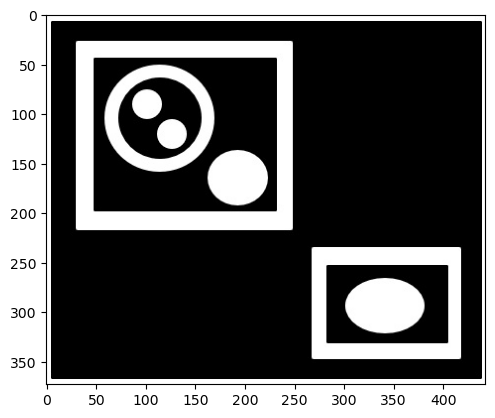

In [45]:
img = cv2.imread('images/contours.jpg')
img_color = img.copy()
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print ('image shape:', img.shape)
plt.imshow(img, cmap='gray')

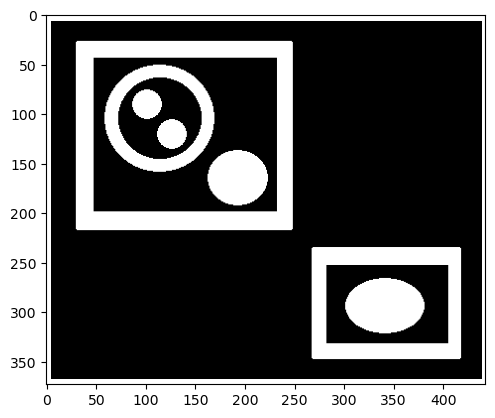

In [36]:
# apply binary thresholding
ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)
# visualize the binary image
plt.imshow(thresh, cmap='gray')

#### **findContours function**

Return back contours, and based on the RETR method called, you can get back external, internal, or both:

* `cv2.RETR_EXTERNAL`: Only extracts external contours
* `cv2.RETR_CCOMP`: Extracts both internal and external contours organized in a two-level hierarchy
* `cv2.RETR_TREE`: Extracts both internal and external contours organized in a tree graph
* `cv2.RETR_LIST`: Extracts all contours without any internal/external relationship

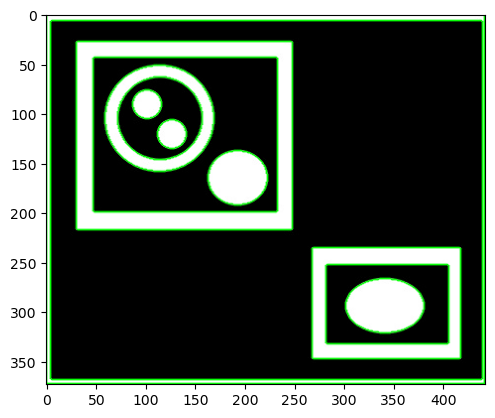

In [38]:
# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

# Draw contours on a copy of color image with 3 channels
cv2.drawContours(image=img_color, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=1, lineType=cv2.LINE_AA)

plt.imshow(img_color)

---

### Internal & External Contour

In [88]:
hierarchy

array([[[-1, -1,  1, -1],
        [-1, -1,  2,  0],
        [ 5, -1,  3,  1],
        [-1, -1,  4,  2],
        [-1, -1, -1,  3],
        [-1,  2,  6,  1],
        [-1, -1,  7,  5],
        [ 8, -1, -1,  6],
        [-1,  7,  9,  6],
        [-1, -1, 10,  8],
        [11, -1, -1,  9],
        [-1, 10, -1,  9]]], dtype=int32)

In [89]:
contours_index_list = []
for i in range(len(contours)):
    
    contours_index_list.append(hierarchy[0][i][3])

contours_index_list = list(set(contours_index_list))
print (*contours_index_list)

0 1 2 3 5 6 8 9 -1


In [90]:
# Draw External Contours

# Set up empty array
external_contours = img.copy()

# For every entry in contours
for i in range(len(contours)):
    
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[0][i][3] == -1:
        
        # We can now draw the external contours from the list of contours
        cv2.drawContours(image=external_contours, contours=contours, contourIdx=i, color=(0, 255, 0), thickness=3, lineType=cv2.LINE_AA)

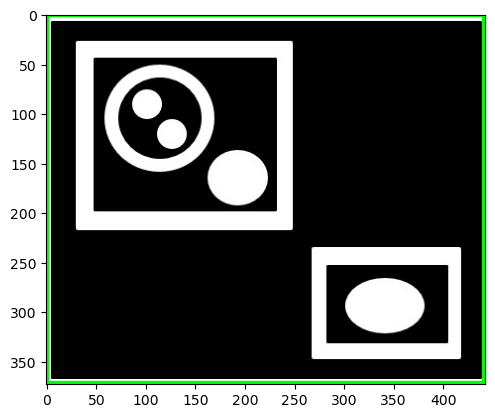

In [91]:
plt.imshow(external_contours)

In [92]:
# Draw Internal Contours

# Set up empty array
internal_contours = img.copy()

# For every entry in contours
for i in range(len(contours)):
    
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[0][i][3] != -1:
        
        # We can now draw the external contours from the list of contours
        cv2.drawContours(image=internal_contours, contours=contours, contourIdx=i, color=(0, 255, 0), thickness=3, lineType=cv2.LINE_AA)

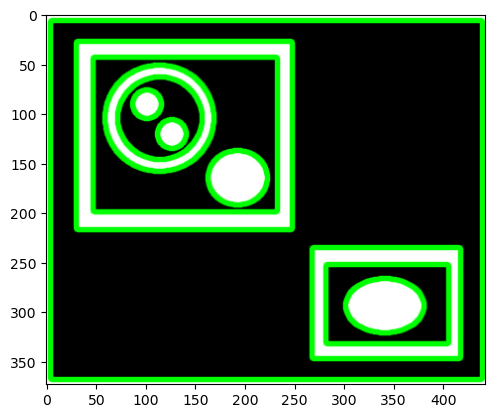

In [93]:
plt.imshow(internal_contours)